In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# parser and IQR computer import
%cd 'drive/My Drive/BoniLabMDR'
from plot_helper import IQR_compute

/content/drive/My Drive/BoniLabMDR


MFT - Compute IQR

In [3]:
# change to targeted folder of datasets
%cd './data/MFT/1-Monthly Data'
# parse output files and computer IQR
(MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf) = IQR_compute(filepattern='monthly_mft_%s.txt')

/content/drive/My Drive/BoniLabMDR/data/MFT/1-Monthly Data


Cycling - Compute IQR

In [4]:
# change to targeted folder of datasets
%cd '../../Cycling/1-Monthly Data'
#%cd './data/Cycling/1-Monthly Data'
# parse output files and computer IQR
(Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf) = IQR_compute(filepattern='monthly_cyc_%s.txt')

/content/drive/My Drive/BoniLabMDR/data/Cycling/1-Monthly Data


Adaptive Cycling - Compute IQR

In [5]:
# change to targeted folder of datasets
%cd '../../Adaptive Cycling/1-Monthly Data'
# parse output files and computer IQR
(AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf) = IQR_compute(filepattern='monthly_adpcyc_%s.txt')

/content/drive/My Drive/BoniLabMDR/data/Adaptive Cycling/1-Monthly Data


Start assembling results:

In [6]:
%cd '../../..'

/content/drive/My Drive/BoniLabMDR


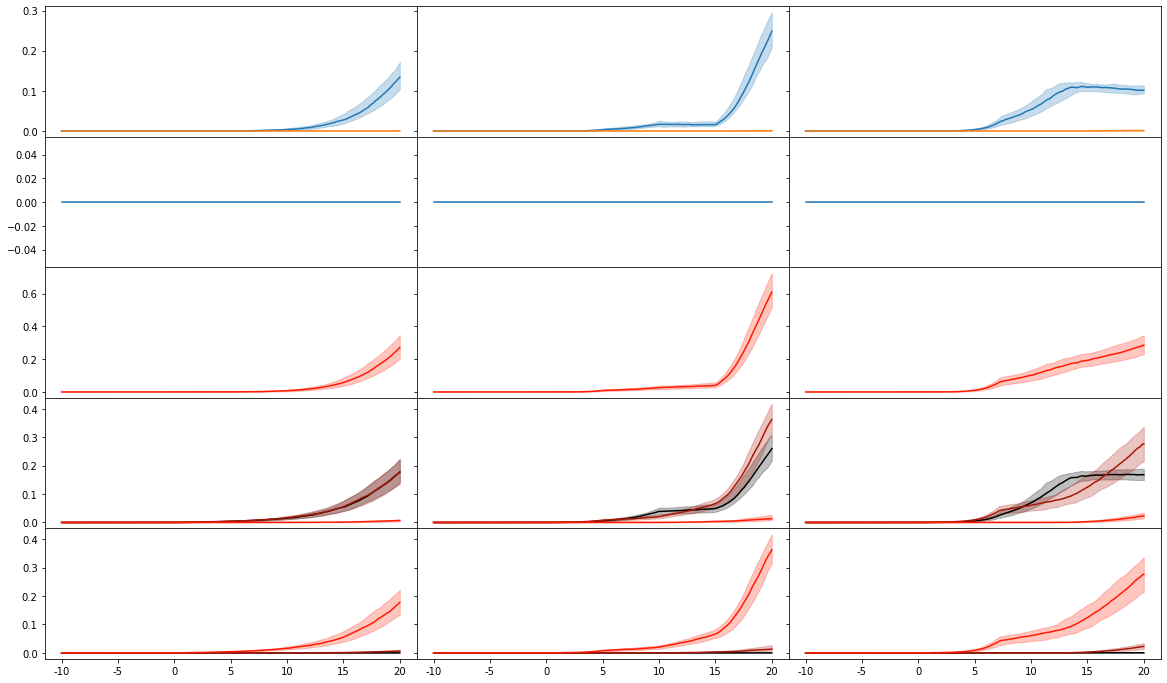

In [12]:
# prepare plt for 5x3 subpanels
import matplotlib.pyplot as plt
from plot_helper import xaxis_label_ticker
import matplotlib.ticker as ticker
xlocator = 5*365
ticks_x = xaxis_label_ticker()

fig, axs = plt.subplots(5, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
plt.rcParams['figure.figsize'] = [20, 12]
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), \
      (ax10, ax11, ax12), (ax13, ax14, ax15) = axs

# plot trends for most-dangerous-triple (2 types)
from plotter import geno_trend_plot_most_dange_trip, \
                    geno_trend_plot_double_higher

#  MFT
geno_trend_plot_most_dange_trip(ax1, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, ['TYY--Y2.','TYYYYY2.'])
geno_trend_plot_most_dange_trip(ax4, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, ['KNFNFY2.'])
geno_trend_plot_double_higher(ax7, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'DHA-PPQ')
geno_trend_plot_double_higher(ax10, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'AS-AQ')
geno_trend_plot_double_higher(ax13, MFT_L_IQRdf, MFT_M_IQRdf, MFT_U_IQRdf, 'AL')

#  Cycling
geno_trend_plot_most_dange_trip(ax2, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, ['TYY--Y2.','TYYYYY2.'])
geno_trend_plot_most_dange_trip(ax5, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, ['KNFNFY2.'])
geno_trend_plot_double_higher(ax8, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'DHA-PPQ')
geno_trend_plot_double_higher(ax11, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'AS-AQ')
geno_trend_plot_double_higher(ax14, Cyc_L_IQRdf, Cyc_M_IQRdf, Cyc_U_IQRdf, 'AL')

#  Adaptive Cycling
geno_trend_plot_most_dange_trip(ax3, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, ['TYY--Y2.','TYYYYY2.'])
geno_trend_plot_most_dange_trip(ax6, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, ['KNFNFY2.'])
geno_trend_plot_double_higher(ax9, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'DHA-PPQ')
geno_trend_plot_double_higher(ax12, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'AS-AQ')
geno_trend_plot_double_higher(ax15, AdpCyc_L_IQRdf, AdpCyc_M_IQRdf, AdpCyc_U_IQRdf, 'AL')

for axrow in axs:
  for ax in axrow:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
    ax.xaxis.set_major_formatter(ticks_x)

plt.show()